In [4]:
include("mode_init/MPAS_Ocean.jl")
include("mode_init/MPAS_OceanHalos.jl")

moveArrays! (generic function with 2 methods)

In [2]:
mpasOcean = MPAS_Ocean("MPAS_O_Shallow_Water/Mesh+Initial_Condition+Registry_Files/Periodic",
                        "base_mesh.nc", "mesh.nc", periodicity="Periodic")
mpasOcean.nCells

2500

# Define Initial Condition

In [16]:
include("mode_init/initial_conditions.jl")

planeWaveInit! (generic function with 1 method)

In [17]:
moveArrays!(mpasOcean, Array)

planeWaveInit!(mpasOcean) # could also do gaussianInit!

In [10]:
include("visualization.jl")

vertexHeatMapMesh (generic function with 1 method)

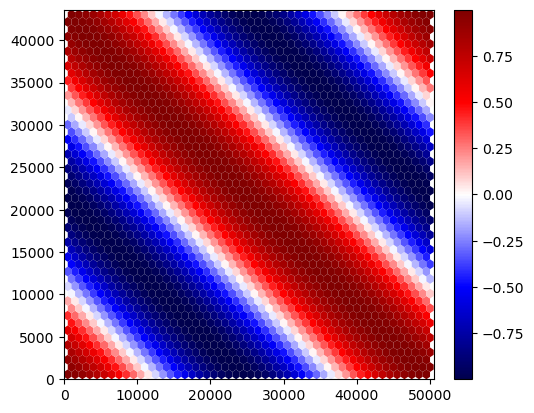

In [15]:
fig, ax, cbar, col = heatMapMesh(mpasOcean, mpasOcean.sshCurrent)
display(fig)

In [13]:
mpasOceanHalos = MPAS_OceanHalos(mpasOcean, 10, 4, 4)
length(mpasOceanHalos.haloChunks)

16

In [41]:
regionColorMap = zeros(mpasOceanHalos.fullOcean.nCells)

for iCell in 1:mpasOceanHalos.fullOcean.nCells
    regionColorMap[iCell] = findall((region -> iCell in region), mpasOceanHalos.cellsWithinHalo)[1]
end
    

In [32]:
include("visualization.jl")

vertexHeatMapMesh (generic function with 1 method)

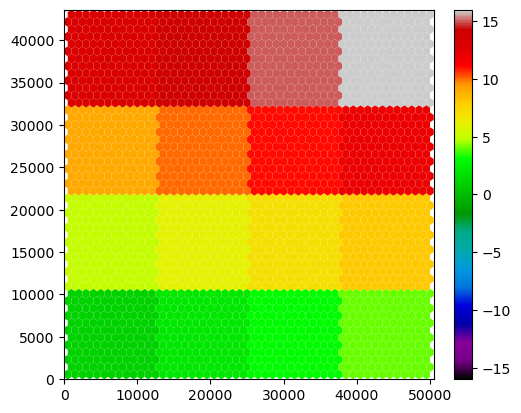

In [40]:
fig, _ = heatMapMesh(mpasOceanHalos.fullOcean, regionColorMap, cmap="nipy_spectral")
display(fig)

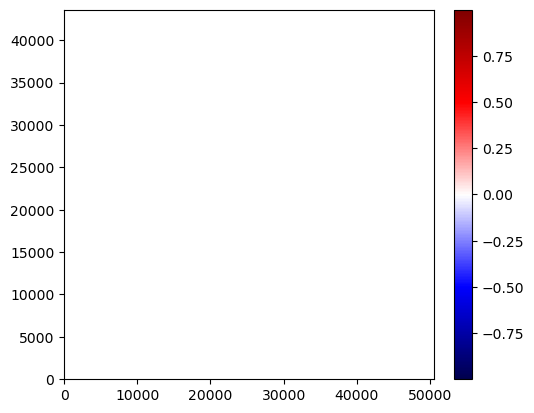

In [14]:
fig, _ = heatMapMesh(mpasOceanHalos.haloChunks[2], mpasOceanHalos.haloChunks[2].sshCurrent)
display(fig)